# A Gentle Introduction to Machine Learning with sklearn

## Basic Tenets

> [Machine Learning] gives computers the ability to learn without being explicitly programmed
>~Arthur Samuel

Finding ways to make machine predict an outcome based on data.
Examples:
1. Given newspaper articles, determine their sentiment, that is, is the article overall positive or negative?
2. Given the amount of time a student studied last night, predict their test score (0-100)
3. Given a whole bunch of pictures, try to name what they are (is it a car?  is it red?  is it alive?)

**Supervised Learning**
Using data with predetermined outcomes to train a model. (e.g. 1,2)

**Unsupervised Learning**
Given data without predetermined outcomes or labels, try to find some pattern (this is harder). (e.g. 3)

**Classification**
Data outcomes given discrete labels (e.g. 1, 3)

**Regression**
Data results in outcomes that are continuous in nature (e.g. 2)

Data comes in the form of features.  For example,
1. Word counts in a newspaper article
2. Number of hours
3. The pixel values

## The Machine Learning Pipeline:
- **Preprocessing/Feature Extraction** - Obtain the data, clean it, and try to get it into a usable form.  This can include imputation (filling in missing data), or scaling the data, etc.  For example, so called "bag of words" representation of text consists of a dictionary of words and then the number of each word that appears in each text document
- **Feature Selection** - Find out what features are relevant (e.g. which words that appear tell you the most about the sentiment of a newspaper article?  Words like "the" are likely to be irrelevant.  Words like "happy" might mean something.
- **Fitting/Training** - Models are actually mathematical formulas that have adjustable parameters.  These parameters can change to yield different outcomes given input data.  In this step, the machine will read in the data and find parameters that maximize some measure that quantifies the quality of its prediction (for example, compute a probability that a data point is predicted correctly and then try to maximize this probability; this is called an MLE - Maximum Likelihood Estimate)
- **Model Selection/Tuning** - Many models have hyperparameters, that is, parameters that YOU the programmer must set up to maximize the quality of the model's predictions.  Sometimes you need to do a little guess and check (try 1 set of hyperparameters on a portion of the set and see how good it is, then try another).  This technique is called Cross Validation
- **Prediction** - Using your tuned and trained model, you can predict test data (equivalent to plugging in values into a massive equation and observing the result)
- **Model Evaluation** - Look at some measures of evaluation (e.g. accuracy/precision of classification, mean squared error for regression, etc.)

Ok, let's play with some data!

## Playing with the MNIST Data set

We will use one of sklearn's many pre-provided data sets, digits - a sample of the MNIST handwritten numbers.

In [1]:
from sklearn import datasets
import numpy as np

digits = datasets.load_digits()
print(digits['DESCR'])
print("Data shape: {}".format(digits.data.shape))
print("Target shape: {}".format(digits.target.shape))
np.column_stack([digits.data, digits.target])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   1.],
       [  0.,   0.,   0., ...,   9.,   0.,   2.],
       ..., 
       [  0.,   0.,   1., ...,   0.,   0.,   8.],
       [  0.,   0.,   2., ...,   0.,   0.,   9.],
       [  0.,   0.,  10., ...,   1.,   0.,   8.]])

Lets get a feel for what kind of data we're dealing with here.

Sample label: 8


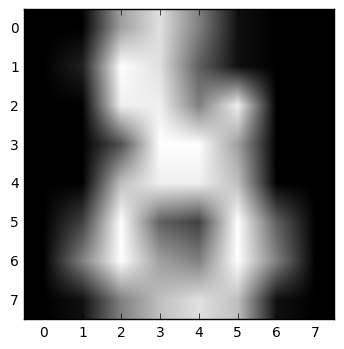

In [3]:
import matplotlib.pyplot as plt

def display_digit(digit_data):
    div = np.full((8,8), 16, dtype=int)
    dig = digit_data.reshape(8,8) / div
    plt.imshow(dig, cmap="gray")
    plt.show()

sample = 1796 # change this to anything between 0 and size of data set (1796) to view a plot of any data point
print("Sample label: {}".format(digits.target[sample]))
display_digit(digits.data[sample])

Now let's pick a model and train it with this data!

Classifier predicted [8]
Actual value: 8


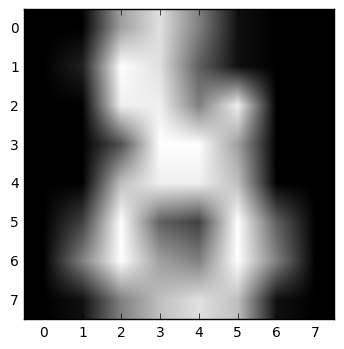

In [4]:
from sklearn.svm import LinearSVC

# Step 1: Create the classifier, specifying parameters (or use defaults)
clf = LinearSVC()

# Step 2: Fit the data!
clf.fit(digits.data, digits.target)

# Step 3: Try predicting something
pred_num = 1796 # Change this to anything between 0 and the size of data set (1796) to predict a different data point
pred = clf.predict([digits.data[pred_num]])
print("Classifier predicted {}".format(pred))
print("Actual value: {}".format(digits.target[pred_num]))
display_digit(digits.data[pred_num])

Now let's evaluate the robustness of our model

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# predict everything we originally trained on
pred = clf.predict(digits.data)
print("Accuracy: {}".format(accuracy_score(digits.target, pred)))
print(classification_report(digits.target, pred))

Accuracy: 0.9794101279910963
             precision    recall  f1-score   support

          0       0.99      1.00      1.00       178
          1       1.00      0.87      0.93       182
          2       1.00      0.99      0.99       177
          3       0.97      1.00      0.99       183
          4       1.00      1.00      1.00       181
          5       0.99      1.00      0.99       182
          6       1.00      1.00      1.00       181
          7       1.00      1.00      1.00       179
          8       0.86      0.99      0.92       174
          9       0.99      0.95      0.97       180

avg / total       0.98      0.98      0.98      1797



This is remarkably accurate!  However, in this case we've tested our model with the same data we trained this with.  To illustrate this, we will split the data and use a different model to motivate why this is the case.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.33, random_state=1)

print("Train X shape: {}".format(X_train.shape))
print("Test X shape: {}".format(X_test.shape))


Train X shape: (1203, 64)
Test X shape: (594, 64)


Let's try a different model this time, called K-Nearest Neighbors (KNN)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# If there are n features in the data and we were to plot the points in an n dimensional space
# KNN will assign a label based on the labels of the closest k points to the data point we wish to predict
clf = KNeighborsClassifier(n_neighbors=5) # Here we let k=5
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train) # predict using the training data
accuracy_score(y_train, y_pred)

0.98836242726517043

Here, k is a hyperparameter, meaning we could change it to get better performance.  Can we do better?

In [8]:
clf = KNeighborsClassifier(n_neighbors=1) # now k=1
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train) # predict using the training data
accuracy_score(y_train, y_pred)

1.0

The prediction on training data was perfect (why?).  But how will it do on the test data set?

In [9]:
y_pred = clf.predict(X_test) # predict using the training data
accuracy_score(y_test, y_pred)

0.98821548821548821

Let's try to find a k that will give us the best results on the test data set.

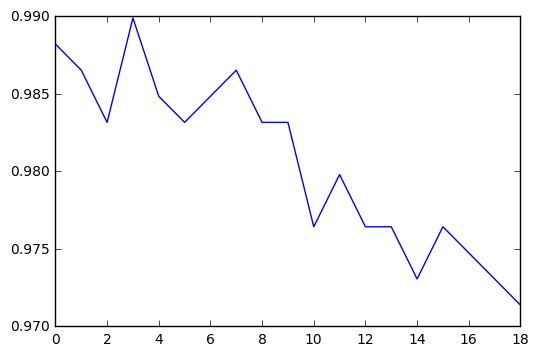

In [10]:
k_results = []
for i in range(1, 20):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    k_results.append(accuracy_score(y_test, y_pred))

plt.plot(k_results)
plt.show()